In [58]:
import pandas as pd
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import mlflow
import mlflow.keras

#hola juanfer, primero vamos a cargar el dataset
df = pd.read_csv("BarcelonaAbnb_limpio.csv")


df.head()
df.info()
df.describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13415 entries, 0 to 13414
Data columns (total 48 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_time                                13415 non-null  float64
 1   host_response_rate                                13415 non-null  float64
 2   host_acceptance_rate                              13415 non-null  float64
 3   host_is_superhost                                 13415 non-null  float64
 4   host_has_profile_pic                              13415 non-null  float64
 5   host_identity_verified                            13415 non-null  float64
 6   latitude                                          13415 non-null  float64
 7   longitude                                         13415 non-null  float64
 8   accommodates                                      13415 non-null  float64
 9   bathrooms        

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,room_type_Shared room,neighbourhood_group_cleansed_Eixample,neighbourhood_group_cleansed_Gràcia,neighbourhood_group_cleansed_Horta-Guinardó,neighbourhood_group_cleansed_Les Corts,neighbourhood_group_cleansed_Nou Barris,neighbourhood_group_cleansed_Sant Andreu,neighbourhood_group_cleansed_Sant Martí,neighbourhood_group_cleansed_Sants-Montjuïc,neighbourhood_group_cleansed_Sarrià-Sant Gervasi
count,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,...,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000
mean,0.409318,93.302274,85.256504,0.241073,0.962579,0.954379,41.392294,2.166916,3.441893,1.418785,...,0.005367,0.351174,0.089676,0.027581,0.021543,0.010734,0.015878,0.094223,0.100485,0.061573
std,0.750400,15.995362,25.449316,0.427751,0.189798,0.208669,0.013932,0.017872,1.940913,0.639469,...,0.073067,0.477355,0.285727,0.163775,0.145191,0.103053,0.125007,0.292149,0.300656,0.240387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.351783,2.091740,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,96.000000,82.000000,0.000000,1.000000,1.000000,41.381220,2.156200,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,100.000000,98.000000,0.000000,1.000000,1.000000,41.390380,2.167810,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,100.000000,100.000000,0.000000,1.000000,1.000000,41.401620,2.177755,4.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,100.000000,100.000000,1.000000,1.000000,1.000000,41.462243,2.221390,16.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


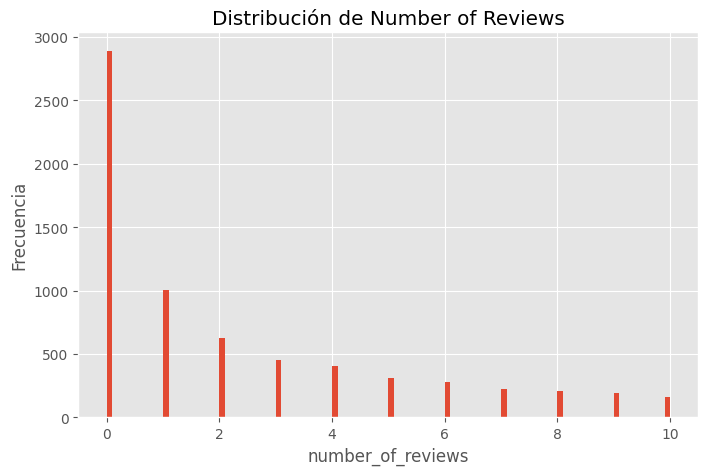

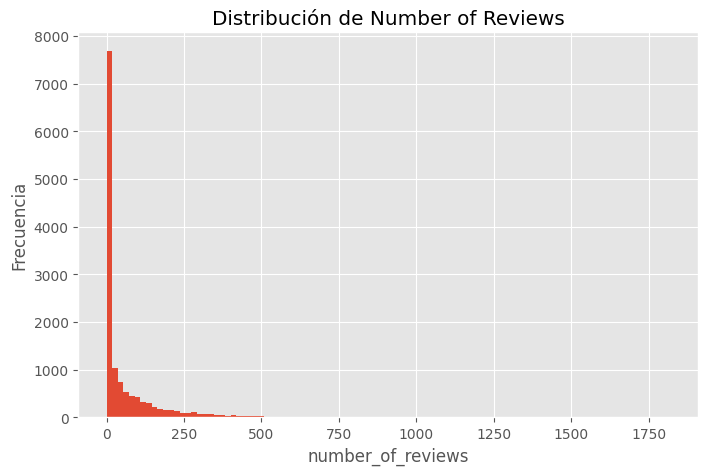

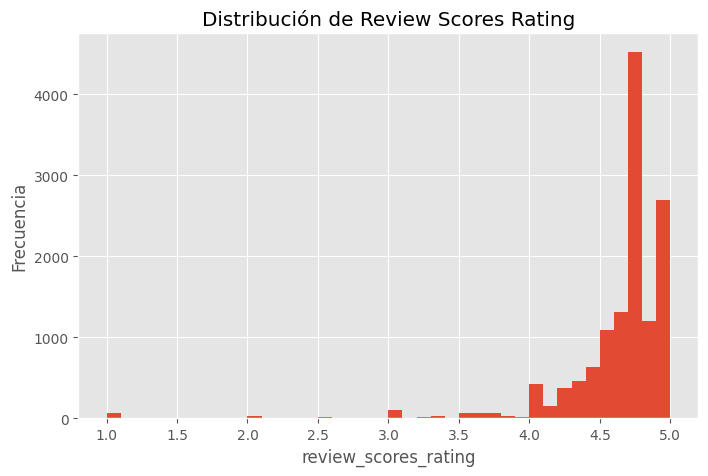

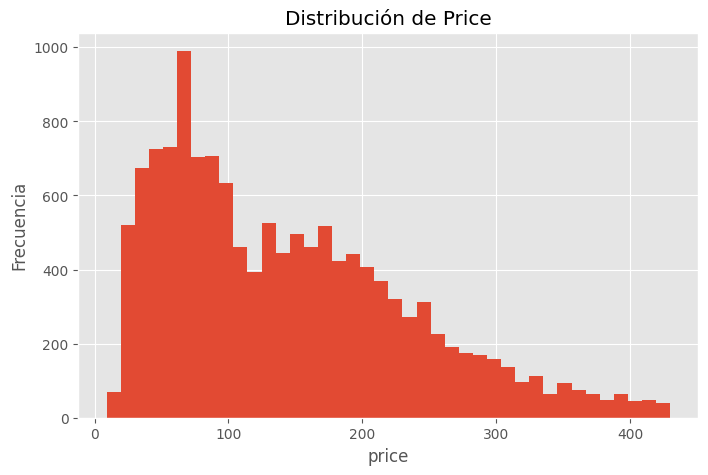

In [59]:
import pandas as pd
import matplotlib.pyplot as plt



#plt.style.use('ggplot')

df2 = df[df["number_of_reviews"]<= 10]
df2.head()

# --------- FIGURA 1---------
plt.figure(figsize=(8,5))
plt.hist(df2["number_of_reviews"].dropna(), bins=100)
plt.title("Distribución de Number of Reviews")
plt.xlabel("number_of_reviews")
plt.ylabel("Frecuencia")
plt.show()
plt.figure(figsize=(8,5))
plt.hist(df["number_of_reviews"].dropna(), bins=100)
plt.title("Distribución de Number of Reviews")
plt.xlabel("number_of_reviews")
plt.ylabel("Frecuencia")
plt.show()

# --------- FIGURA 2---------
plt.figure(figsize=(8,5))
plt.hist(df["review_scores_rating"].dropna(), bins=40)
plt.title("Distribución de Review Scores Rating")
plt.xlabel("review_scores_rating")
plt.ylabel("Frecuencia")
plt.show()

# --------- FIGURA 3---------
plt.figure(figsize=(8,5))
plt.hist(df["price"].dropna(), bins=40)
plt.title("Distribución de Price")
plt.xlabel("price")
plt.ylabel("Frecuencia")
plt.show()


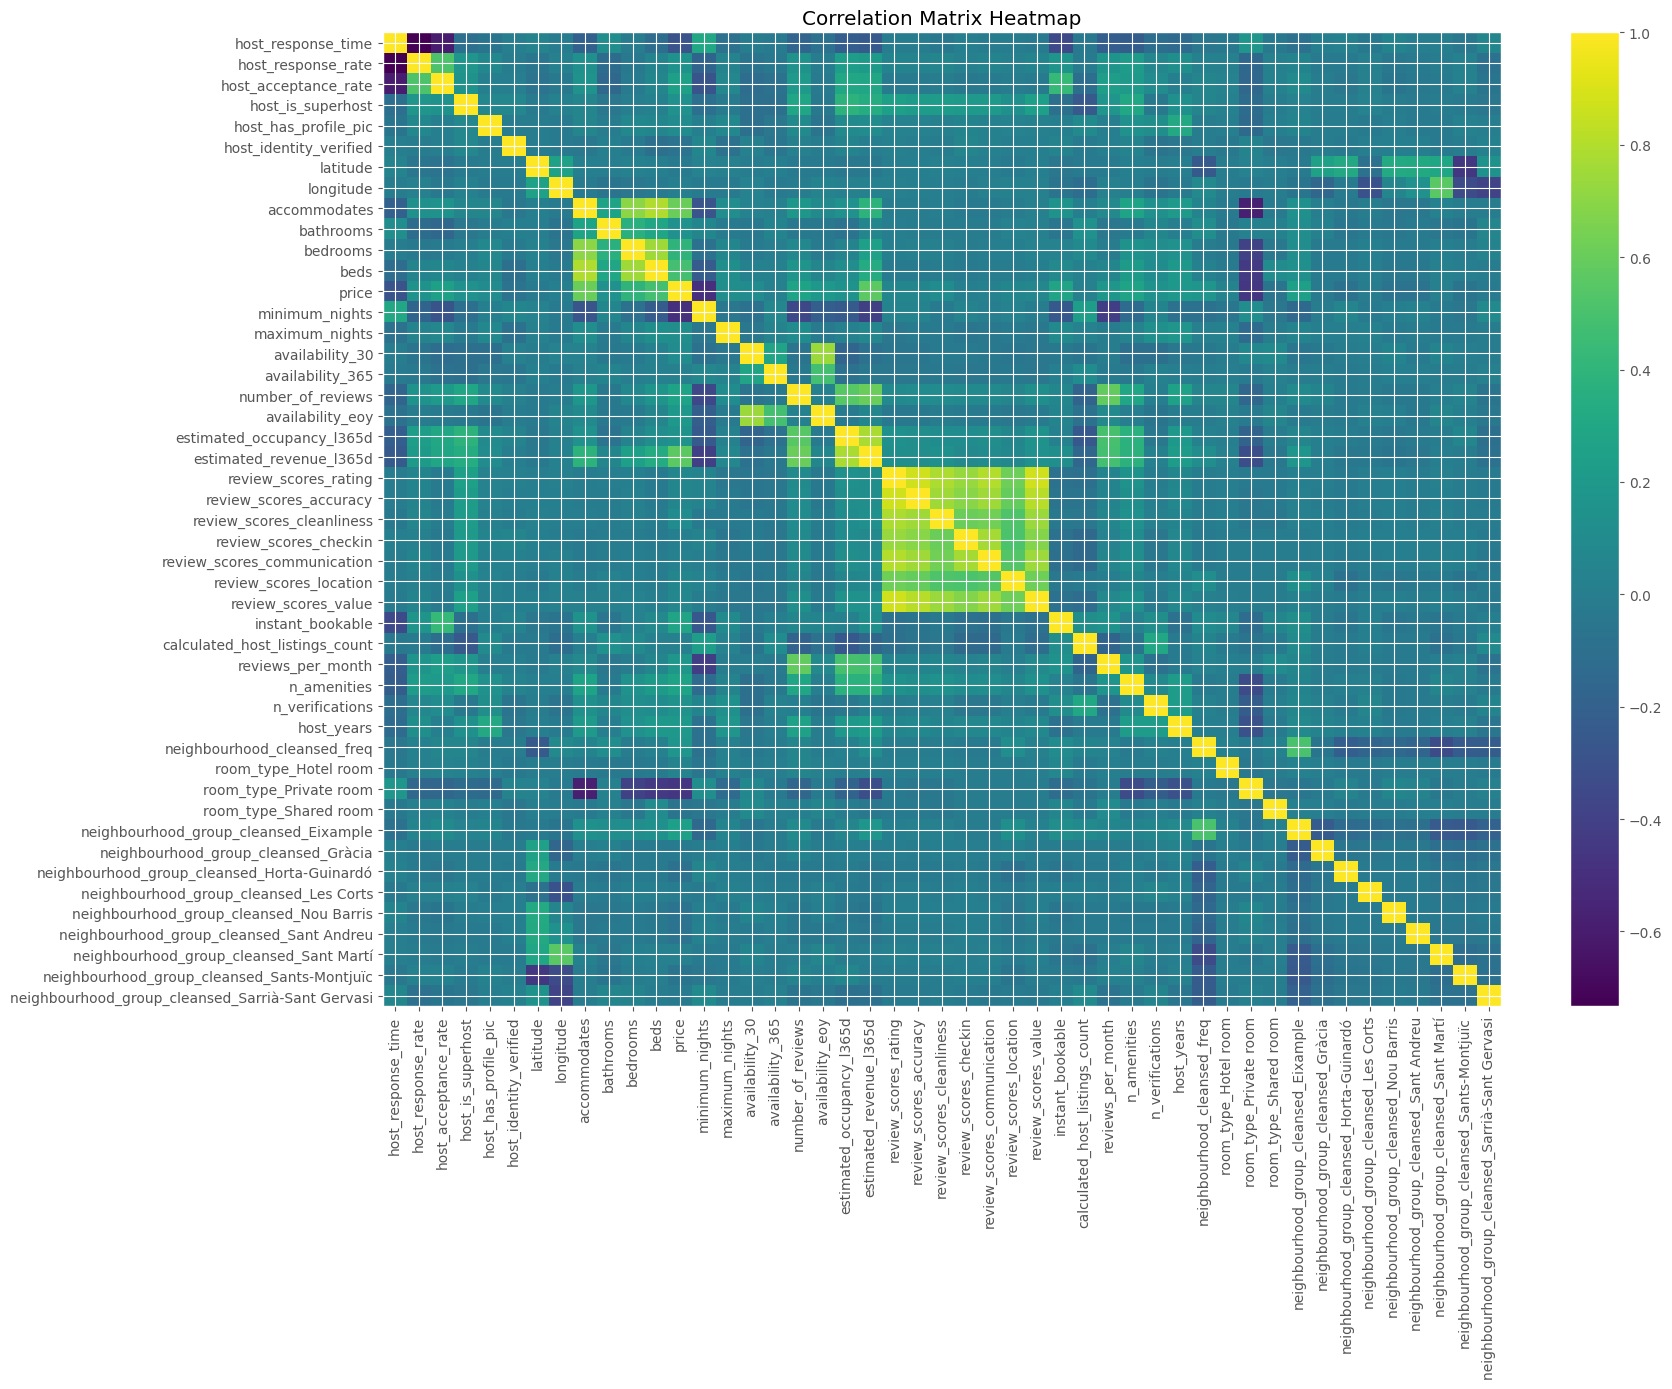

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset limpio
df = pd.read_csv("BarcelonaAbnb_limpio.csv")

# Seleccionar solo columnas numéricas
num_df = df.select_dtypes(include=[np.number])

# Matriz de correlación
corr_matrix = num_df.corr()

# Graficar heatmap de correlación
plt.figure(figsize=(18, 14))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.title("Correlation Matrix Heatmap")

# Etiquetas en los ejes
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.tight_layout()
plt.show()


In [61]:

# Crear tabla de frecuencias
freq_table = (
    df2["number_of_reviews"]
    .value_counts()      
    .sort_index()        
    .reset_index()       
)

freq_table.columns = ["number_of_reviews", "frequency"]

# Mostrar tabla
print(freq_table.sum(), len(df))


number_of_reviews      55
frequency            6771
dtype: int64 13415


In [62]:
# ----------------------------
# 2. Crear variable "recommended"
# ----------------------------

# Criterio:x
# recommended = 1 si:
# - review_scores_rating >= 4.5
# - number_of_reviews >= 10
# - price <= Q75


q75_price = df["price"].quantile(0.75)

df["recommended"] = np.where(
    (df["review_scores_rating"] >= 4.5) &
    (df["number_of_reviews"] >= 10) &
    (df["price"] <= q75_price),
    1,
    0)


df["recommended"].value_counts(normalize=True)


recommended
0    0.753336
1    0.246664
Name: proportion, dtype: float64

In [ ]:
# ----------------------------
# 3. Selección de features
# ----------------------------
# One-hot encoding de la variable property_type_clean
df_encoded = pd.get_dummies(df, columns=["property_type_clean"], drop_first=True)
df_encoded["property_type_clean_Entire rental unit"] = df_encoded["property_type_clean_Entire rental unit"].astype(int)
df_encoded["property_type_clean_Entire serviced apartment"] = df_encoded["property_type_clean_Entire serviced apartment"].astype(int)
df_encoded["property_type_clean_Other"] = df_encoded["property_type_clean_Other"].astype(int)
df_encoded["property_type_clean_Private room in rental unit"] = df_encoded["property_type_clean_Private room in rental unit"].astype(int)
df_encoded["property_type_clean_Room in hotel"] = df_encoded["property_type_clean_Room in hotel"].astype(int)


df_encoded.head()


y_clf = df_encoded["recommended"].values


cols_leakage = [
    "recommended",
    "price",

    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",

    "number_of_reviews",
    "reviews_per_month",

    "estimated_occupancy_l365d",
    "estimated_revenue_l365d",

    "availability_30",
    "availability_365",
    "availability_eoy"
]

X = df_encoded.drop(columns=cols_leakage)

X = X.select_dtypes(include=["number"])

X = df_encoded.drop(columns=cols_excluir)

print(X.shape)
X.head()


(13415, 49)


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,neighbourhood_group_cleansed_Nou Barris,neighbourhood_group_cleansed_Sant Andreu,neighbourhood_group_cleansed_Sant Martí,neighbourhood_group_cleansed_Sants-Montjuïc,neighbourhood_group_cleansed_Sarrià-Sant Gervasi,property_type_clean_Entire rental unit,property_type_clean_Entire serviced apartment,property_type_clean_Other,property_type_clean_Private room in rental unit,property_type_clean_Room in hotel
0,0.0,96.0,91.0,0.0,1.0,1.0,41.405560,2.17262,8.0,2.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,100.0,96.0,1.0,1.0,1.0,41.412432,2.21975,5.0,2.0,...,0,0,1,0,0,1,0,0,0,0
2,0.0,100.0,100.0,0.0,1.0,1.0,41.405660,2.17015,6.0,2.0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,100.0,92.0,0.0,1.0,1.0,41.380620,2.17517,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,100.0,92.0,0.0,1.0,1.0,41.379780,2.17623,9.0,3.0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
# ----------------------------
# 4. Train / Test split
# ----------------------------

X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf,
    test_size=0.2,
    random_state=42
)

# ----------------------------
# 5. Escalamiento (StandardScaler)
# ----------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((10732, 49), (2683, 49))

In [65]:
# ----------------------------
# 9. Modelo de Clasificación - Red Neuronal
# ----------------------------

def build_classification_model(n_features,
                               n_hidden1=64,
                               n_hidden2=32,
                               n_hidden3=16,
                               learning_rate=1e-3,
                               dropout_rate=0.2):
    model = keras.Sequential([
        layers.Input(shape=(n_features,)),
        layers.Dense(n_hidden1, activation="relu"),
        layers.Dropout(dropout_rate),
        layers.Dense(n_hidden2, activation="relu"),
        layers.Dropout(dropout_rate),
        layers.Dense(n_hidden3, activation="relu"),
        layers.Dense(1, activation="sigmoid")  
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

n_features = X_train_scaled.shape[1]
print(n_features)
model_clf = build_classification_model(n_features)
model_clf.summary()


49


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# ----------------------------
# 10. Entrenamiento Clasificación
# ----------------------------

history_clf = model_clf.fit(
    X_train_scaled, y_clf_train,
    validation_data=(X_test_scaled, y_clf_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# ----------------------------
# 11. Evaluación en test
# ----------------------------

y_clf_proba = model_clf.predict(X_test_scaled).flatten()
y_clf_pred = (y_clf_proba >= 0.5).astype(int)

acc = accuracy_score(y_clf_test, y_clf_pred)
f1 = f1_score(y_clf_test, y_clf_pred)
prec = precision_score(y_clf_test, y_clf_pred)
rec = recall_score(y_clf_test, y_clf_pred)
roc = roc_auc_score(y_clf_test, y_clf_proba)

print(f"Accuracy (test): {acc:.3f}")
print(f"F1       (test): {f1:.3f}")
print(f"Precision(test): {prec:.3f}")
print(f"Recall   (test): {rec:.3f}")
print(f"ROC-AUC  (test): {roc:.3f}")


Epoch 1/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7759 - loss: 0.4526 - val_accuracy: 0.8375 - val_loss: 0.3643
Epoch 2/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8526 - loss: 0.3338 - val_accuracy: 0.8576 - val_loss: 0.3224
Epoch 3/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8693 - loss: 0.2988 - val_accuracy: 0.8740 - val_loss: 0.2910
Epoch 4/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8829 - loss: 0.2746 - val_accuracy: 0.8792 - val_loss: 0.2683
Epoch 5/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8888 - loss: 0.2551 - val_accuracy: 0.8859 - val_loss: 0.2542
Epoch 6/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8963 - loss: 0.2404 - val_accuracy: 0.8889 - val_loss: 0.2459
Epoch 7/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8998 - loss: 0.2312 - val_accuracy: 0.8900 - val_loss: 0.2419
Epoch 8/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9064 - loss: 0.2215 - val_accu

In [ ]:
# ----------------------------
# 12. MLflow - Configuración
# ----------------------------

mlflow.set_tracking_uri("http://localhost:5000")  # o tu IP:puerto
mlflow.set_experiment("airbnb-barcelona-nn")
